# Tarea EDP

## Lizeth Daniela Jaimes González



* ¿Cómo podemos mejorar las funciones ECnL(), ED() y EB() para no tener que usar dos bucles anidados?

* Implemente un código que permita, a partir de las funciones dadas mostrar en una sola imagen (3x3) que contenga, el dato inicial $u_0(x,0)$, el resultado de estudiar la ecuación lineal y el resultado de estudiar la ecuación no lineal. Esto para $nx= 21$ $nx= 41$ y $nx= 81$, Describa sus apreciaciones, y analice el porqué de los resultados obtenidos.

* En las comparaciones hechas anteriormente, tanto en la parte lineal como la no lineal, son iguales, parecidos o totalmente diferentes los datos obtenidos, ¿por qué? Realice un trabajo similar para la ecuación de difusión y la ecuación de Burgers. ¿Qué apreciaciones le merece?



In [1]:
import numpy as np                    
import matplotlib.pyplot as plt

In [4]:
# El primer punto fue hecho en clase, en el cual usamos el método tradicional y el método "roll"

def ECnL(u, nx, nt = 25, nu = 0.3):
    dx = 2 / (nx-1)
    sigma = 0.3 
    c = 1
    dt = sigma * dx / c 
    for n in range(nt): 
        un = u.copy()
        u[1:] = un[1:]- un[1:] * (dt / dx) * (un[1:] - un[:-1])
    return u

def ED(u, nx, nt = 20, nu = 0.3):
    dx = 2 / (nx-1)
    sigma = 0.3 
    dt = sigma * dx**2 / nu 
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2])
    return u

def EB(u, nx, nt = 20, nu = 0.3):
    dx = 2 / (nx-1)
    sigma = 0.3 
    dt = sigma * dx**2 / nu 
    for n in range(nt):  
        u_der = np.roll(u,-1)
        u_izq = np.roll(u,1)
        u = u - u *dt / dx * (u -u_izq) + nu * dt / dx**2 * (u_izq - 2*u +u_der)
    return u

In [18]:
# Para el segundo punto se necesita definir el dato inicial y la ecuación lineal
def f1(nx):
    dx = 2 / (nx-1)
    u = np.ones(nx)      
    u[int(.5 / dx):int(1 / dx + 1)] = 2  
    return u

def mostrar_imagen(u,nx):
    plt.plot(np.linspace(0, 2, nx), u);
    
def ECL(u, nx, nt = 25):
    dx = 2 / (nx-1)
    sigma = .3 
    c = 1
    dt = sigma * dx / c 
    for n in range(nt): 
        un = u.copy()
        u[1:] = un[1:]- c * (dt / dx) * (un[1:] - un[:-1])
    return u

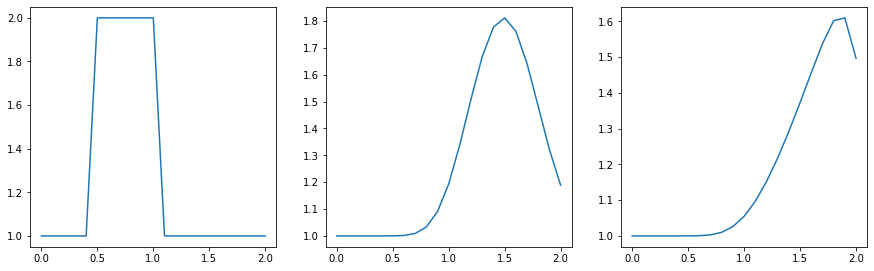

In [19]:
#Ahora, se grafican las 3 funciones para el caso nx=21
plt.figure(figsize=(15,15))
nx = 21
plt.subplot(3, 3, 1) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 2) 
mostrar_imagen(ECL(f1(nx),nx),nx)
plt.subplot(3, 3, 3) 
mostrar_imagen(ECnL(f1(nx),nx),nx)

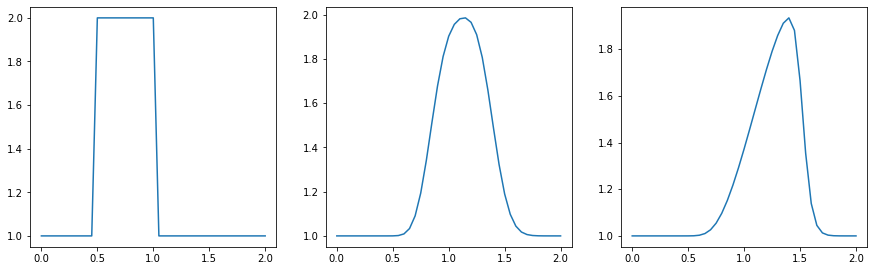

In [12]:
# se grafican las 3 funciones para el caso nx=41
plt.figure(figsize=(15,15))
nx = 41
plt.subplot(3, 3, 1) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 2) 
mostrar_imagen(ECL(f1(nx),nx),nx)
plt.subplot(3, 3, 3) 
mostrar_imagen(ECnL(f1(nx),nx),nx)

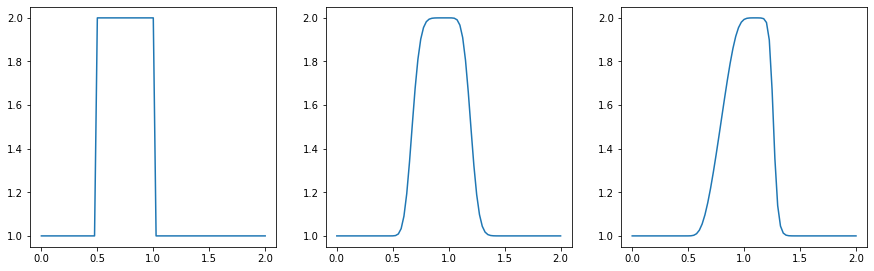

In [13]:
# se grafican las 3 funciones para el caso nx=81
plt.figure(figsize=(15,15))
nx = 81
plt.subplot(3, 3, 1) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 2) 
mostrar_imagen(ECL(f1(nx),nx),nx)
plt.subplot(3, 3, 3) 
mostrar_imagen(ECnL(f1(nx),nx),nx)

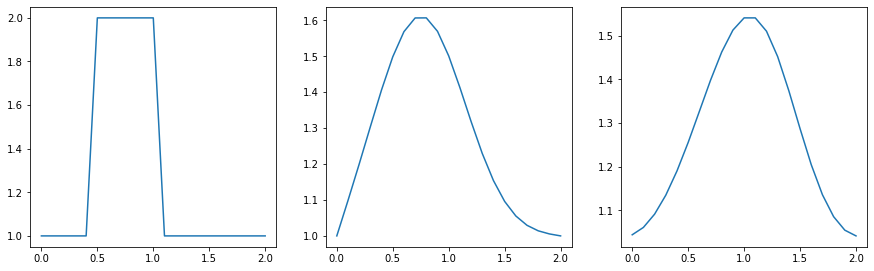

In [20]:
# Finalmente, comparamos el dato incial con la ecuación de difusión y de Burguer para los mismos nx del punto pasado
plt.figure(figsize=(15,15))
nx = 21
plt.subplot(3, 3, 1) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 2) 
mostrar_imagen(ED(f1(nx),nx),nx)
plt.subplot(3, 3, 3) 
mostrar_imagen(EB(f1(nx),nx),nx)

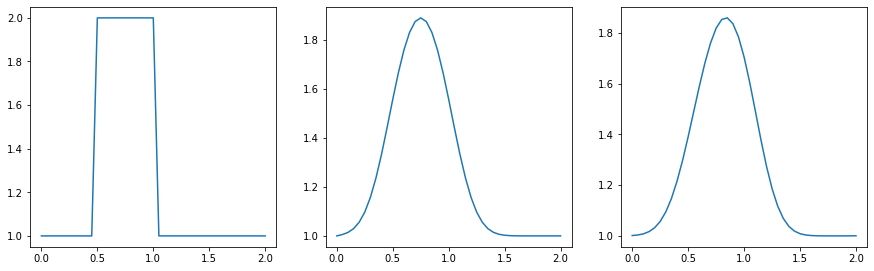

In [21]:
plt.figure(figsize=(15,15))
nx = 41
plt.subplot(3, 3, 1) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 2) 
mostrar_imagen(ED(f1(nx),nx),nx)
plt.subplot(3, 3, 3) 
mostrar_imagen(EB(f1(nx),nx),nx)

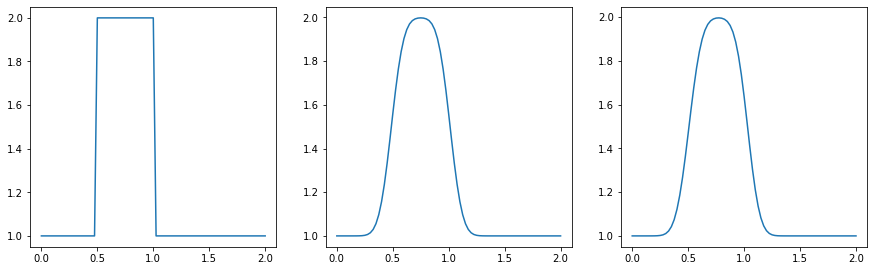

In [22]:
plt.figure(figsize=(15,15))
nx = 81
plt.subplot(3, 3, 1) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 2) 
mostrar_imagen(ED(f1(nx),nx),nx)
plt.subplot(3, 3, 3) 
mostrar_imagen(EB(f1(nx),nx),nx)